# Modelo de predição para Detecção de Doenças Cardíacas

## Introdução
Um grupo de pesquisa na área médica deseja criar um modelo de Machine Learning que consiga classificar se pacientes têm ou não doença cardíaca, com base em alguns dados demográficos e também resultados de exames médicos que essas pessoas fizeram.

Os dados foram obtidos no [Kaggle](https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/data), tendo como sua fonte primária [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). Esses dados foram doados em 1988 e provêm dos resultados clínicos e de testes não invasivos realizados em pacientes submetidos a exames na Cleveland Clinic em Cleveland (Ohio), no Instituto Húngaro de Cardiologia em Budapeste, em um Centro Médico em Long Beach (Califórnia), e também em pacientes de Hospitais universitários em Zurique e Basel (Suíça).

## Objetivos
O objetivo deste projeto é desenvolver um modelo de classificação, aprimorando o desempenho com XGBoost.

## Dicionário de Dados

- **Idade**: Idade em anos;
- **Sexo**: Sexo biológico (0 = feminino, 1 = masculino);
- **Tipo dor**: Tipo de dor no peito relatada pelo paciente (1= angina típica, 2 = angina atípica, 3 = não angina, 4 = angina assintomática).
- **Pressao arterial**: Pressão arterial medida em repouso.
- **Colesterol**: Nível de colesterol no sangue em miligramas por decilitro (mg/dl);
- **Glicemia jejum >120**: Nível de glicose no sangue em jejum, indicando se está abaixo de 120 mg/dl ou acima de 120 mg/dl (0 = abaixo, 1 = acima);
- **Resultados ECG**: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade de onda ST-T, 2 = hipertrofia ventricular esquerda).
- **Frequencia cardiaca max**: Frequência cardíaca máxima alcançada durante um teste de esforço físico;
- **Dor exercicio**: Indica se houve angina (dor no peito) induzida por exercício ou não (0 = sim, 1 = não);
- **Depressao ST**: Medida da depressão do segmento ST induzida pelo exercício em relação ao repouso.
- **Inclinacao ST**: Inclinação do segmento ST no pico do exercício (1 = inclinado para cima, 2 = plano, 3 = inclinado para baixo).
- **Numero vasos fluro**: Número de vasos sanguíneos principais coloridos durante o procedimento de fluoroscopia.
- **Teste cintilografia**: Resultado do teste de estresse com tálio (3 = normal, 6 = defeito fixo, 7 = defeito reversível).
- **Doença Cardíaca**: Se paciente possui doença cardíaca.

## Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [2]:
dados = pd.read_csv('Dados/Heart_Disease_Prediction.csv')
dados

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Ausencia
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Ausencia
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Ausencia
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Ausencia


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
dados.describe()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Análise Exploratória de Dados

### Idade

Ao examinar o gráfico, é evidente que a incidência de doença cardíaca aumenta com a idade. O limite inferior começa por volta dos 40 anos, com a mediana aproximadamente aos 60 anos e o limite superior ultrapassando os 70 anos. Por outro lado, na ausência de doença cardíaca, o limite inferior é observado em uma faixa etária mais jovem, cerca de 30 anos. A mediana está ligeiramente acima dos 50 anos, e o último quartil está próximo dos 60 anos.

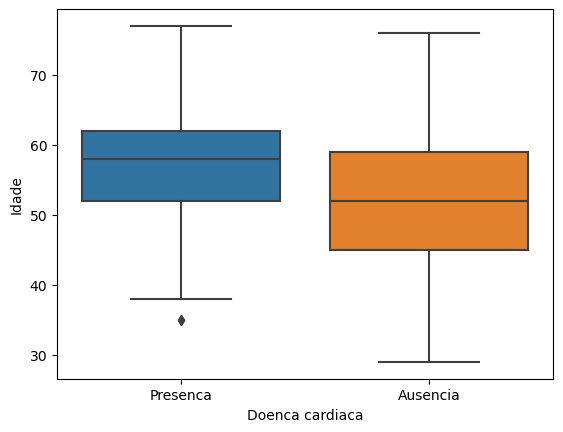

In [5]:
sns.boxplot(data=dados, x='Doenca cardiaca', y='Idade');

### Sexo

No gráfico abaixo, é evidente que a presença de doença cardíaca é menos comum em mulheres, enquanto é significativamente mais alta em homens, ultrapassando o número de casos em que a doença está ausente.

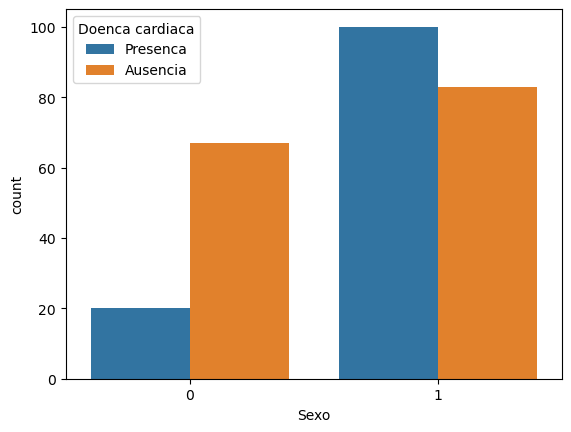

In [6]:
sns.countplot(data=dados, x='Sexo', hue='Doenca cardiaca');

### Tipo de dor

A angina é uma condição médica caracterizada por dor ou desconforto no peito.
Aqui, observamos que quanto maior o valor, mais provavelmente está relacionada à presença da doença.

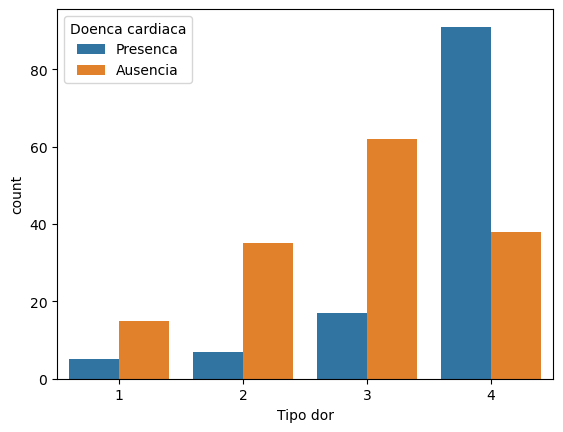

In [7]:
sns.countplot(data=dados, x='Tipo dor', hue='Doenca cardiaca');

### Pressão arterial

A pressão arterial é a força que o sangue exerce contra as paredes das artérias enquanto é bombeado pelo coração para o resto do corpo. Essa pressão é essencial para garantir o fluxo sanguíneo e a entrega de oxigênio e nutrientes aos órgãos e tecidos do corpo.

No gráfico, observa-se uma semelhança entre os boxplots, porém, quanto mais alta a pressão arterial, maior a probabilidade de desenvolver doenças cardíacas. O limite superior do boxplot atinge 180 na presença da doença, enquanto na sua ausência, é relativamente baixo, em torno de 160.

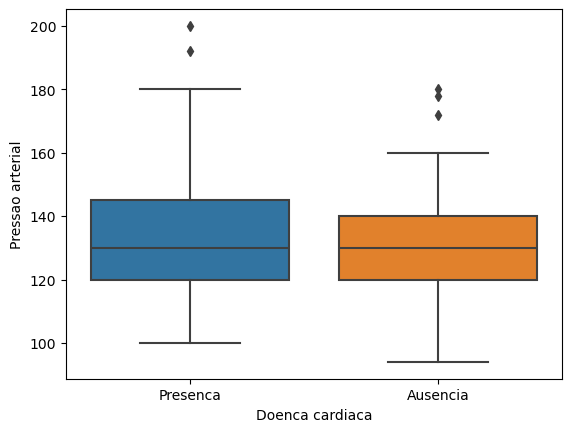

In [8]:
sns.boxplot(data=dados, x='Doenca cardiaca', y='Pressao arterial');

### Colesterol

No gráfico, é evidente que ambos os boxplots são semelhantes, com valores aproximados para os limites inferior e superior, assim como para a mediana. Existe uma diferença sutil no qual mostra que o colesterol é maior na presença da doença.

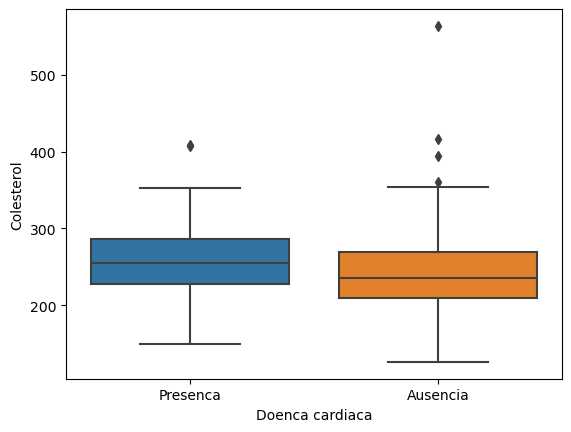

In [9]:
sns.boxplot(data=dados, x='Doenca cardiaca', y='Colesterol');

### Nível de glicose no sangue em jejum, indicando se está abaixo de 120 mg/dl ou acima de 120 mg/dl 

(0 = abaixo, 1 = acima)

No gráfico, é perceptível que a presença da doença cardíaca é mais comum quando o nível de glicose no sangue em jejum é inferior a 120 mg/dL, mas isso não significa necessariamente que a pessoa tenha a doença. Podemos inferir que a probabilidade de uma pessoa ter doença cardíaca é menor quando o nível de glicose no sangue em jejum é superior a 120 mg/dL.

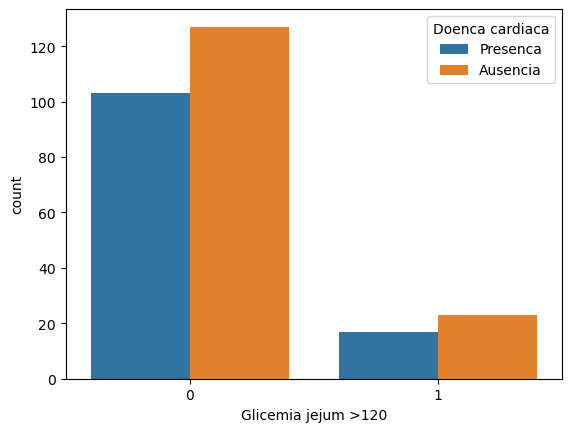

In [10]:
sns.countplot(data=dados, x='Glicemia jejum >120', hue='Doenca cardiaca');

### Resultados do eletrocardiograma em repouso 

(0 = normal, 1 = anormalidade de onda ST-T, 2 = hipertrofia ventricular esquerda)

O eletrocardiograma (ECG) é um exame médico que registra a atividade elétrica do coração ao longo do tempo. Quando os resultados do ECG em repouso são considerados "normais", indica que a atividade elétrica do coração está dentro dos padrões regulares. No entanto, anormalidades na onda ST-T podem sugerir irregularidades na função cardíaca. Além disso, a presença de hipertrofia ventricular esquerda, que é um aumento do tamanho do músculo cardíaco no lado esquerdo do coração, geralmente indica uma resposta a uma pressão aumentada no sistema circulatório.

Em relação aos resultados do eletrocardiograma, é importante notar que há uma maior probabilidade de doença cardíaca estar presente quando há hipertrofia ventricular esquerda, mas também é crucial estar atento aos resultados de ECG normais, pois eles podem não descartar completamente a presença de problemas cardíacos.

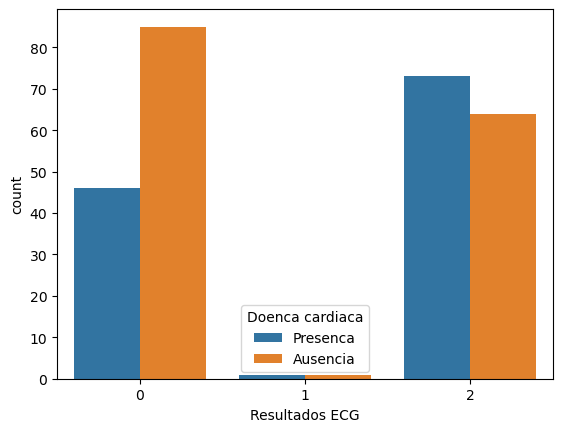

In [11]:
sns.countplot(data=dados, x='Resultados ECG', hue='Doenca cardiaca');

### Frequência cardíaca máxima alcançada durante um teste de esforço físico

No gráfico abaixo, é notável que a maioria das pessoas com doença cardíaca possui uma frequência cardíaca máxima menor em comparação com aqueles sem a doença. O limite inferior é consideravelmente baixo para os casos de doença, enquanto o limite superior é próximo aos casos sem a doença.

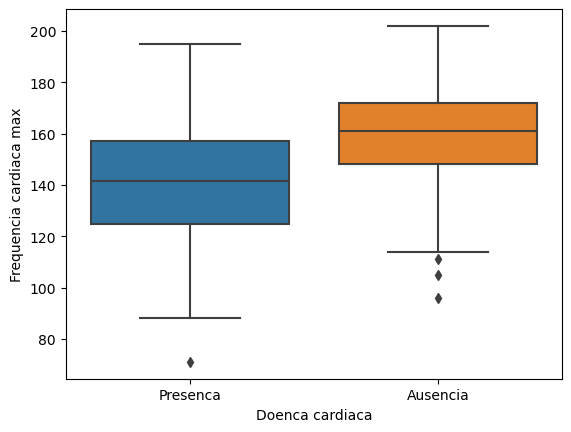

In [12]:
sns.boxplot(data=dados, x='Doenca cardiaca', y='Frequencia cardiaca max');

### Dor exercício: Indica se houve angina (dor no peito) induzida por exercício ou não 

No gráfico abaixo, observamos que a presença ou ausência de angina (dor no peito) induzida por exercício parece não ter um impacto significativo na presença de doenças cardíacas, já que os valores são semelhantes. No entanto, é perceptível que a presença de angina é mais comum entre as pessoas que têm a doença em comparação com aquelas que não têm.

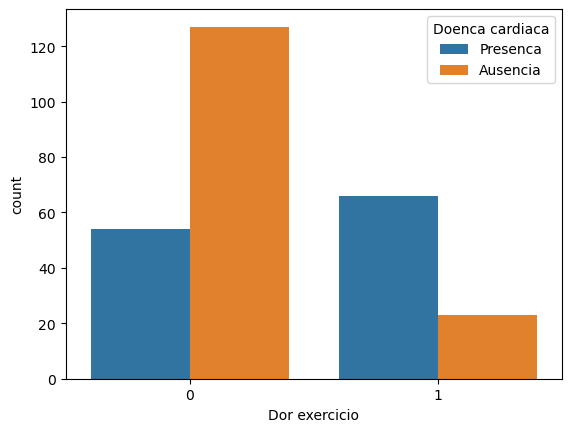

In [13]:
sns.countplot(data=dados, x='Dor exercicio', hue='Doenca cardiaca');

### Depressão ST

O segmento ST é como um intervalo na leitura desse gráfico que nos informa sobre o relaxamento do coração após a contração. Quando o gráfico mostra uma parte chamada "segmento ST" mais baixa do que o normal durante esse relaxamento, indica que o coração pode não estar recebendo sangue suficiente, o que é conhecido como depressão do segmento ST.

No gráfico, observamos que na ausência da doença, os valores de depressão do segmento ST são baixos, enquanto na presença da doença são altos.

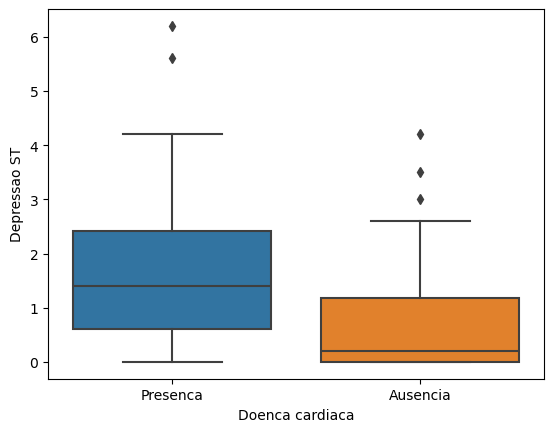

In [14]:
sns.boxplot(data=dados, x='Doenca cardiaca', y='Depressao ST');

### Inclinação ST

No gráfico, é possível observar que a presença da doença cardíaca é mais comum quando a inclinação do segmento ST no pico do exercício é plana. Quando a inclinação é para cima, a probabilidade de uma pessoa ter doença cardíaca parece ser menor, embora ainda seja maior do que quando está inclinada para baixo.

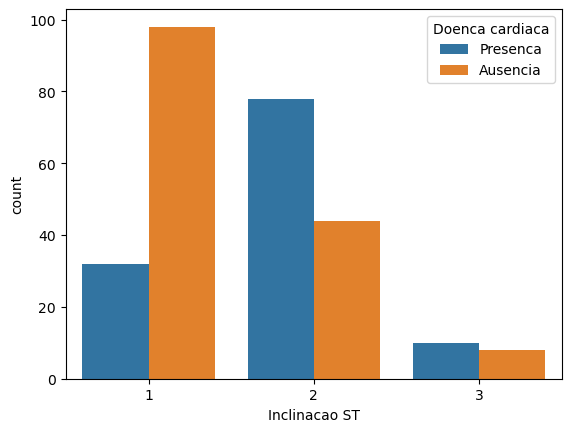

In [15]:
sns.countplot(data=dados, x='Inclinacao ST', hue='Doenca cardiaca');

### Número de vasos sanguíneos principais coloridos durante o procedimento de fluoroscopia

Observando o gráfico abaixo, podemos perceber que a presença da doença cardíaca é mais comum quando há uma menor quantidade de vasos sanguíneos coloridos durante o procedimento de fluoroscopia. No entanto, quanto maior for a quantidade de vasos sanguíneos coloridos, maior é a probabilidade de uma pessoa ter doença cardíaca, o que indica a necessidade de investigação adicional. É importante ressaltar que é na maioria das vezes é improvável que uma pessoa sem a doença apresente mais de um vaso sanguíneo colorido durante o procedimento.

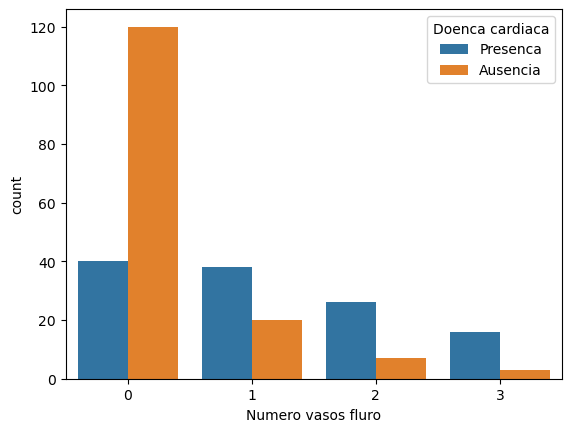

In [16]:
sns.countplot(data=dados, x='Numero vasos fluro', hue='Doenca cardiaca');

### Teste cintilografia

A cintilografia cardíaca utiliza tálio radioativo para avaliar a saúde do coração. Durante o exame, imagens do coração são capturadas enquanto o paciente é submetido a estresse físico. O tálio viaja pelo sangue até o músculo cardíaco, revelando possíveis obstruções nos vasos sanguíneos. Esse exame é útil para determinar a viabilidade do músculo cardíaco e se as áreas afetadas podem se recuperar com tratamento.

Analisando o gráfico, é evidente que a maioria das pessoas com doença cardíaca apresenta defeito reversível, seguido por resultados normais e, em menor número, defeito fixo. Por outro lado, na ausência da doença, a maioria dos resultados é normal, com poucos casos de defeito fixo e reversível.

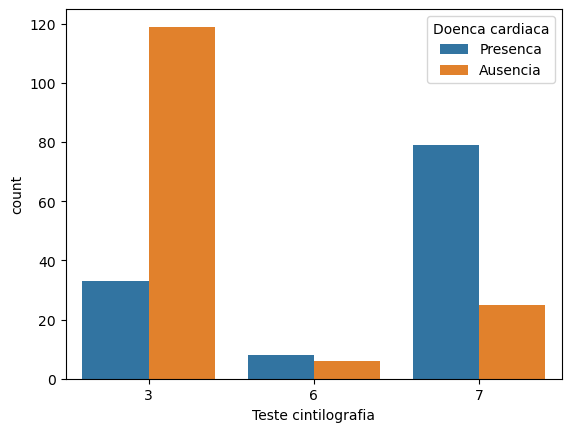

In [17]:
sns.countplot(data=dados, x='Teste cintilografia', hue='Doenca cardiaca');

### Verificando a quantidade de doença cardíaca
Analisamos os valores dos targets e podemos notar que os valores estão razoavelmente balanceados. Ainda, realizamos a substituição dos valores da coluna para números 0 e 1.

In [18]:
dados['Doenca cardiaca'].value_counts(normalize=True) * 100

Doenca cardiaca
Ausencia    55.555556
Presenca    44.444444
Name: proportion, dtype: float64

In [19]:
# Substiruindo os valores categóricos por numéricos
dados['Doenca cardiaca'] = dados['Doenca cardiaca'].map({'Presenca': 1, 'Ausencia': 0})

# Dataframe com os valores mapeados
dados

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


## Iniciando a classificação

### Separando os dados de features e target

Após a análise dos dados, os dados foram separados em features *(Todas as colunas menos Doenca cardiaca)* e target *(Doenca cardiaca)*.

In [20]:
X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

### Separando os dados de treino e teste

Os dados foram divididos em uma proporção de 80% para treinamento e 20% para teste, e a opção `stratify=y` foi usada para garantir que a proporção das classes seja mantida tanto nos conjuntos de treinamento quanto nos conjuntos de teste. Isso é particularmente útil quando temos classes desbalanceadas e queremos garantir que o modelo seja treinado e testado em uma distribuição representativa das classes. As classes 0 e 1 são as classes de destino ou alvo que o modelo tentará prever.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Treinando o modelo

Abaixo, treinamos o modelo de árvore de decisão no qual retornou aproximadamente 76% de acurácia, ou seja, nosso modelo está acertando 76% das previsões. 

In [22]:
# Instanciando o modelo
modelo_dt = DecisionTreeClassifier(random_state=0)

# Treinando o modelo
modelo_dt.fit(X_train, y_train)

# Fazendo previsões
y_pred_dt = modelo_dt.predict(X_test)

# Avaliando a acurácia
acuracia_dt = accuracy_score(y_test, y_pred_dt)

print(f'Acurácia: {acuracia_dt * 100 :.2f} %')

Acurácia: 75.93 %


#### Classification Report

Analisando as métricas, em relação à classe 0, a precisão é de 0.81 e o recall é de 0.73, indicando um desempenho razoável, mas não excelente. 

Na classe 1, que é nosso principal foco (doença cardíaca), a precisão é um pouco menor, com 0.70, porém o recall é mais alto, atingindo 0.79. O F1-score, que é a média harmônica entre precisão e recall, é de 0.77 para a classe 0 e 0.75 para a classe 1.

In [23]:
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.70      0.79      0.75        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



#### Gráfico ROC

O gráfico mostra o AUC (Área Sob a Curva) do modelo de Decision Tree, com valor de 0.76. Os eixos representam a taxa de falsos positivos (x) e a taxa de verdadeiros positivos (y).
O AUC ideal se aproxima de 1, com melhor desempenho quando na lateral superior esquerda. Nosso valor é 0.76, indicando uma capacidade decente de separação das classes. 

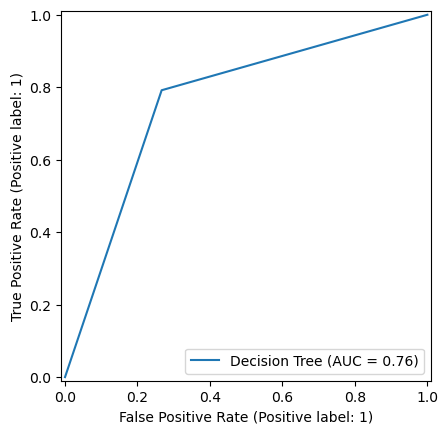

In [24]:
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name='Decision Tree');

### Aprimorando os resultados utilizando XGBoost

O XGBoost é um algoritmo baseado em árvores de decisão. Ele combina os resultados de várias árvores para formar um comitê de decisão robusto. Essa abordagem é utilizada para resolver problemas de classificação, como determinar se um paciente tem ou não uma doença cardíaca, ou qualquer outro problema de classificação semelhante.

Como estamos trabalhando com classificação binária, passamos a informação `objective='binary:logistic'` para o modelo atribuir valores de probabilidade de ser de uma classe ou de outra.

O modelo retornou acurácia de 81%, maior em comparação ao modelo de decisão de árvore.

In [25]:
# Instanciando o modelo
xg_cl = xgb.XGBClassifier(objective='binary:logistic')

# Treinando o modelo
xg_cl.fit(X_train, y_train)

# Fazendo previsões
y_pred_xg = xg_cl.predict(X_test)

# Avaliando a acurácia
acuracia_xg = accuracy_score(y_test, y_pred_xg)

print(f'Acurácia: {acuracia_xg * 100 :.2f} %')

Acurácia: 81.48 %


#### Classification Report

Podemos observar que o desempenho é superior da árvore de decisão, ou seja, conseguimos um modelo melhor.
Para a classe 0, temos uma precisão de 0.86 e um recall de 0.80, enquanto para a classe 1, a precisão é de 0.77 e o recall de 0.83. O F1-score, a nossa média harmônica, é de 0.83 para a classe 0 e 0.80 para a classe 1.

In [26]:
report_xg = classification_report(y_test, y_pred_xg)
print(report_xg)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



#### Gráfico ROC

Quanto ao gráfico ROC do modelo XGBoost também apresentou um resultado superior, sendo o valor do AUC 0.82, mais próximo de 1.

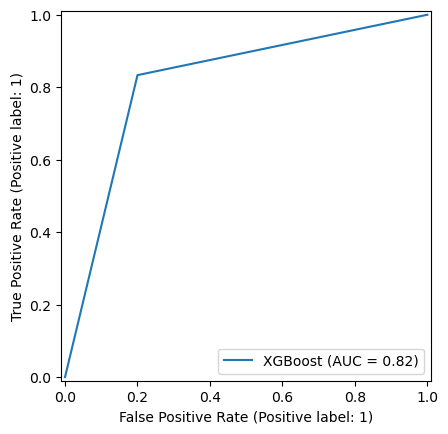

In [27]:
RocCurveDisplay.from_predictions(y_test, y_pred_xg, name='XGBoost');

#### Matriz de Confusão

A matriz de confusão atualizada revela que o modelo está corretamente identificando 80% dos casos de ausência de doença cardíaca, com 20% sendo falsos positivos. No entanto, observamos que 17% das pessoas com a doença estão sendo erroneamente classificadas como não tendo a doença, representando falsos negativos. Em relação aos casos positivos de doença cardíaca, o modelo está identificando corretamente 83% das pessoas.

Dado que lidamos com dados de classificação médica, nosso foco principal é minimizar os falsos negativos, que correspondem ao terceiro quadrante com 17%, indicando pessoas erroneamente classificadas como não tendo a doença quando na verdade têm. Isso é prejudicial para um diagnóstico precoce. Portanto, nossa ênfase será em maximizar o recall da classe 1 para tentar reduzir esse valor.

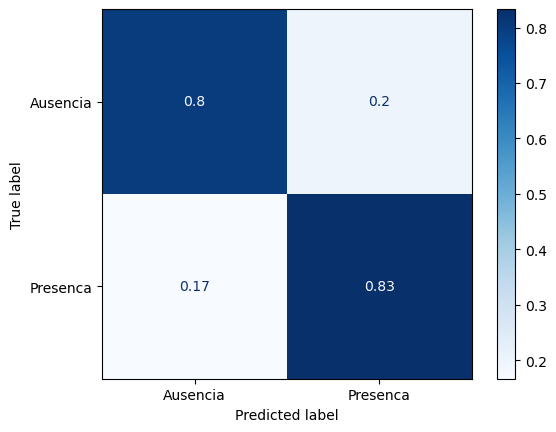

In [28]:
ConfusionMatrixDisplay.from_estimator(xg_cl, X_test, y_test, 
                                      display_labels=['Ausencia', 'Presenca'], 
                                      normalize='true', cmap='Blues');

### Validação cruzada

Devido à quantidade de dados trabalhados serem menores, optaremos por usar a validação cruzada para uma análise mais precisa do desempenho do modelo. 

Primeiramente, convertemos nosso conjunto de dados para uma estrutura otimizada chamada DMatrix, desenvolvida pelos criadores do XGBoost para melhorar o desempenho e a eficiência do modelo. Em seguida, definimos os parâmetros do modelo XGBoost e os aplicamos na validação cruzada. Ainda, utilizamos o Early stopping para determinar a quantidade ideal de iterações para o parâmetro num_boost_round.

Ao analisar os resultados, observamos que a cada iteração, os erros diminuem tanto nos dados de treinamento quanto nos dados de teste, atingindo a acurácia de aproximadamente 80% e parando na rodada 7.

In [29]:
# Convertendo os dados para o formato DMatrix
dmatrix = xgb.DMatrix(data=X, label=y)

# Definindo os parâmetros
params = {
    'objective': 'binary:logistic',
}

# Aplicando a validação cruzada
cv_results = xgb.cv(dtrain=dmatrix,     # Dados de treino
                    params=params,      # Parâmetros
                    nfold=3,            # Número de folds
                    num_boost_round=100, # Número de rounds que desejamos que o modelo execute
                    metrics='error',    # Métrica de avaliação
                    as_pandas=True,     # Retornar o resultado como um DataFrame
                    early_stopping_rounds=5, # Parar o treinamento se a métrica não melhorar
                    seed=123)

# Calculando a acurácia
acuracia_gb_cv = 1 - cv_results['test-error-mean'].iloc[-1]

# Exibindo os resultados e acurácia
print(cv_results)
print(f'Acurácia: {acuracia_gb_cv * 100 :.2f} %')

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.138889         0.023570         0.288889        0.055184
1          0.081481         0.010476         0.262963        0.010476
2          0.068519         0.013858         0.248148        0.037771
3          0.050000         0.007857         0.229630        0.010476
4          0.046296         0.010476         0.222222        0.018144
5          0.033333         0.013608         0.214815        0.013858
6          0.024074         0.006929         0.207407        0.013858
Acurácia: 79.26 %


### Ajustes dos hiperparâmetros

No caso abaixo, adicionamos mais hiperparâmetros para treinar o modelo:
* `'objective': 'binary:logistic',`
* `'max_depth': 5,`
* `'colsample_bytree': 0.3,`
* `'learning_rate': 0.1`

Ao comparar os resultados com o modelo anterior, notamos uma melhoria na acurácia, que aumentou para 80.74%.

In [31]:
# Definindo os parâmetros
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'colsample_bytree': 0.3,
    'learning_rate': 0.1
}

# Aplicando a validação cruzada
cv_results = xgb.cv(dtrain=dmatrix,     # Dados de treino
                    params=params,      # Parâmetros
                    nfold=3,            # Número de folds
                    num_boost_round=100, # Número de rounds que desejamos que o modelo execute
                    metrics='error',    # Métrica de avaliação
                    as_pandas=True,     # Retornar o resultado como um DataFrame
                    early_stopping_rounds=5, # Parar o treinamento se a métrica não melhorar
                    seed=123)

# Calculando a acurácia
acuracia_gb_cv = 1 - cv_results['test-error-mean'].iloc[-1]

# Exibindo os resultados e acurácia
print(cv_results)
print(f'Acurácia: {acuracia_gb_cv * 100 :.2f} %')

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.353704         0.103869         0.414815        0.108992
1           0.274074         0.087528         0.377778        0.118634
2           0.225926         0.094426         0.314815        0.099519
3           0.150000         0.061027         0.255556        0.080635
4           0.137037         0.049759         0.233333        0.063505
5           0.122222         0.020787         0.218519        0.057616
6           0.105556         0.024003         0.218519        0.042873
7           0.100000         0.016355         0.222222        0.039545
8           0.098148         0.005238         0.207407        0.036665
9           0.096296         0.006929         0.200000        0.036289
10          0.088889         0.007857         0.203704        0.027716
11          0.090741         0.002619         0.203704        0.027716
12          0.081481         0.006929         0.192593        0.027716
Acurác

### Random Search para localizar melhores hiperparâmetros

Abaixo, definimos um dicionário de hiperparâmetros para aplicar o RandomizedSearchCV a fim de encontrar os melhores hiperparâmetros. 
Em seguida, instanciamos o RandomizedSearchCV e passamos os parâmetros para realizar a validação cruzada. 
Os melhores parâmetros encontrados são: ***{'n_estimators': 25, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.1}***, resultando em uma acurácia melhor de 82.24%.

In [32]:
# Criando dicionário de hiperparâmetros
params = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [0, 2, 4, 6, 10],
    'colsample_bytree': [0.1 , 0.5, 1],
    'n_estimators': [10, 25, 50]
}

# Instanciando o modelo
modelo_xgb = xgb.XGBClassifier()

# Instanciando o RandomizedSearchCV
random_search_cv = RandomizedSearchCV(estimator=modelo_xgb,     # Modelo                                    
                                    param_distributions=params, # Dicionário de hiperparâmetros
                                    n_iter=5,                   # Número de iterações
                                    cv=4,                       # Número de folds
                                    scoring='accuracy',         # Métrica de avaliação
                                    verbose=1,                  # Exibir resultados
                                    random_state=123)

# Treinando o modelo
random_search_cv.fit(X, y)

# Exibindo os melhores parâmetros e acurácia
print(f'Melhores parâmetros encontrados: {random_search_cv.best_params_}')
print(f'Acurácia: {random_search_cv.best_score_ * 100 :.2f} %')

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Melhores parâmetros encontrados: {'n_estimators': 25, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
Acurácia: 82.24 %
